Project 1: Student Performance Predictor

In this project, I built a supervised machine learning model to predict whether a student will pass or fail.
The model uses study hours, attendance, and internal marks as input features.
We apply the k-Nearest Neighbors (kNN) classification algorithm and evaluate its performance using standard metrics.

We import essential Python libraries:
- NumPy for numerical computations
- Pandas for data manipulation and tabular data handling
- Matplotlib for visualizing data distributions


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Since real-world data is not always available initially, I generated a synthetic dataset.
Each row represents a student, and each column represents a feature.
The target variable `pass_fail` is created using logical conditions to simulate real academic outcomes.


In [2]:
np.random.seed(42)
n = 200

study_hours = np.random.uniform(0, 8, n)
attendance = np.random.uniform(50, 100, n)
internal_marks = np.random.uniform(0, 30, n)

pass_fail = (
    (study_hours > 3) &
    (attendance > 75) &
    (internal_marks > 12)
).astype(int)

data = pd.DataFrame({
    "study_hours": study_hours,
    "attendance": attendance,
    "internal_marks": internal_marks,
    "pass_fail": pass_fail
})

data.head()


,study_hours,attendance,internal_marks,pass_fail
0,2.996321,82.101582,3.093716,0
1,7.605714,54.206998,27.076587,0
2,5.855952,58.081436,15.157571,0
3,4.789268,94.927709,24.793724,1
4,1.248149,80.321453,9.601488,0


Before training a model, it is important to understand whether the dataset is balanced.
Class imbalance can lead to misleading evaluation results.


In [3]:
data["pass_fail"].value_counts()


,count
pass_fail,
0,167
1,33


Data visualization helps us understand how features relate to the target variable.
Here, I have visualized study hours and internal marks, with color indicating pass or fail.


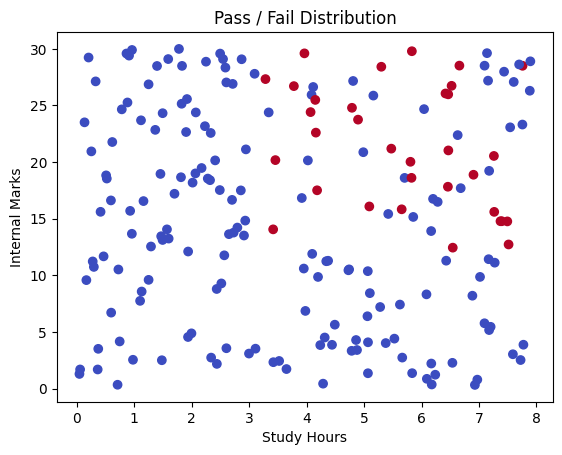

In [4]:
plt.scatter(
    data["study_hours"],
    data["internal_marks"],
    c=data["pass_fail"],
    cmap="coolwarm"
)

plt.xlabel("Study Hours")
plt.ylabel("Internal Marks")
plt.title("Pass / Fail Distribution")
plt.show()

I have separated input features and target labels.
The data is split into training and testing sets to evaluate generalization.
Feature scaling is applied because kNN is sensitive to feature magnitude.


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[["study_hours", "attendance", "internal_marks"]]
y = data["pass_fail"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


The k-Nearest Neighbors classifier predicts a class by majority voting among the k closest data points.
The value of k controls the bias-variance tradeoff.


In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

I evaluated the trained model using accuracy, precision, recall, and F1-score.
These metrics provide deeper insight into model performance than accuracy alone.


In [7]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        31
           1       1.00      0.44      0.62         9

    accuracy                           0.88        40
   macro avg       0.93      0.72      0.77        40
weighted avg       0.89      0.88      0.86        40



To improve performance, we test different values of k.
This helps find the optimal balance between underfitting and overfitting.


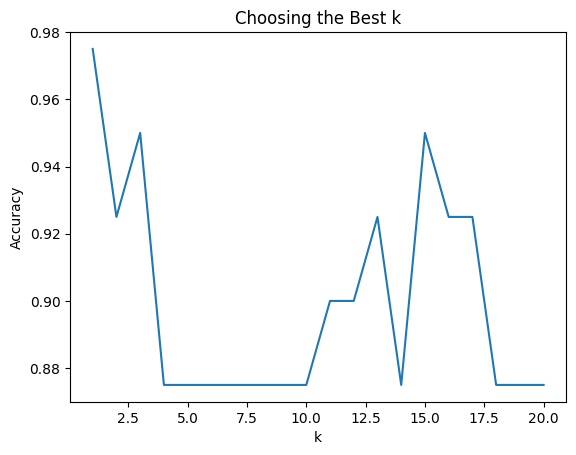

In [8]:
scores = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.plot(range(1, 21), scores)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Choosing the Best k")
plt.show()

This project demonstrates the complete machine learning workflow:
data generation, preprocessing, model training, evaluation, and tuning.
The approach can be extended using real datasets and more advanced models.
